In [6]:
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

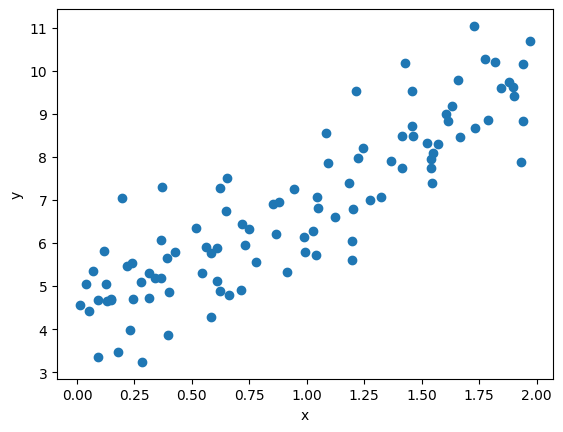

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.21509616]
 [9.75532293]]


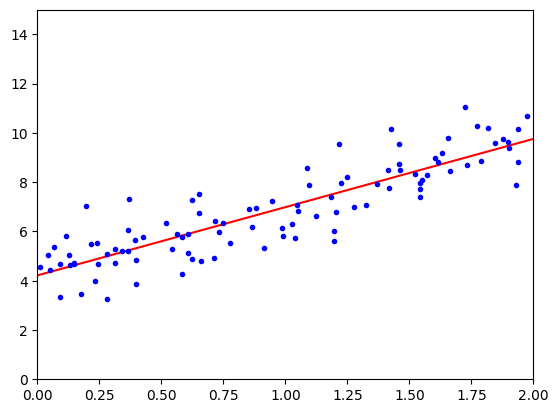

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[4.21509616]
 [2.77011339]]


In [13]:
print(np.linalg.pinv(X_b).dot(y))

[[4.21509616]
 [2.77011339]]


In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21376342] [2.79743197]


In [15]:
#polynomial regression
m=100
X = 6 * np.random.rand(m, 1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

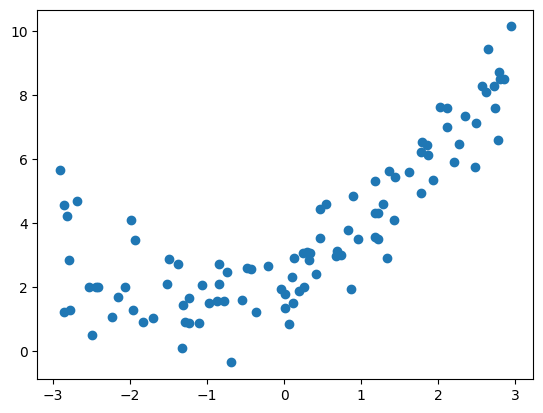

In [23]:
plt.scatter(X, y)
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.01582256]
[0.01582256 0.00025035]


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.26809281] [[1.03372741 0.45317144]]


In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[5.19180256]]


In [28]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
print(sgd_reg.predict([[1.5]]))


[5.16257991]


In [29]:
from sklearn.linear_model import Lasso
ridge_reg = Lasso(alpha=0.1)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[5.15046603]


In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
print(elastic_net.predict([[1.5]]))

[5.14982145]


In [31]:
#logistic regression
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [37]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(int)

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

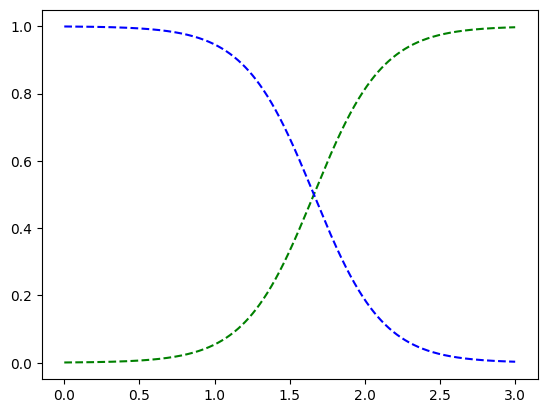

In [40]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g--', label='iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not iris virginica')
plt.show()

In [41]:
#softmax regression
X = iris.data[:, (2,3)]
y = iris.target

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [42]:
print(softmax_reg.predict([[5,2]]))

[2]


In [43]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])